In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from scipy.fft import fft,fftfreq

$$ \ddot{x} + r\dot{x} + \omega _o^2 x + \beta x^3 = f cos \omega t $$

Fazendo mudança de variável:
$$\dot{x} = v$$

Logo

$$ \dot{v} + rv + \omega _0^2 x + \beta x^3 = f cos \omega t $$

Teremos então o seguinte sistema de edo:

$$\begin{align*}
\frac{dv}{dt} &= f cos \omega t - (rv + \omega _0^2 x + \beta x^3) \\
\frac{dx}{dt} &= v
\end{align*}$$

In [9]:
def edo(t,y):
    global w
    f = 4.5
    w = 1
    r = 0.1
    v = y[0]
    x = y[1]
    wo2 = 1
    b = 0
    dvdt = f * np.cos(w*t) - (r*v + wo2*x + b*x**3)
    dxdt = v

    return [dvdt,dxdt]

w = 1
condições_iniciais1 = [0,10] # velocidade e posição

Para o calculo da seção de poincaré

In [10]:
t0 = 0
numero_pontos = 5000
tfinal = numero_pontos * 2 * np.pi/w
incremento =tfinal/numero_pontos
ts_poincare = np.arange(t0, tfinal, incremento)


sol_poincare = solve_ivp(edo,t_span=[t0,tfinal],y0=condições_iniciais1,t_eval=ts_poincare)

x1_poincare = sol_poincare.y[1]
v1_poincare = sol_poincare.y[0]

Para o calculo normal

In [11]:
t0 = 0
numero_pontos = 5000
tfinal = 1000
incremento =tfinal/numero_pontos
ts = np.arange(t0, tfinal, incremento)


sol = solve_ivp(edo,t_span=[t0,tfinal],y0=condições_iniciais1,t_eval=ts)

x1 = sol.y[1]
v1 = sol.y[0]

A seguir o gráfico do espaço de fase:

Text(0, 0.5, 'x (m)')

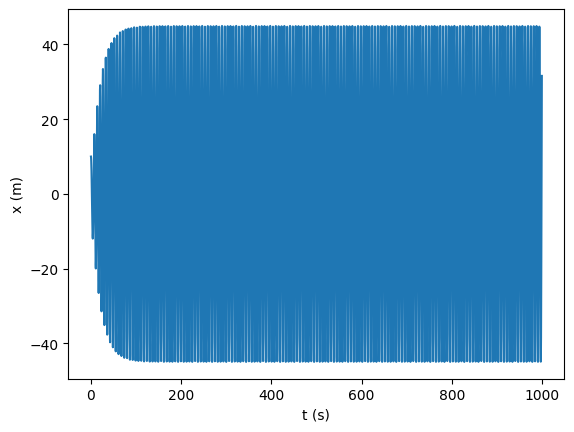

In [12]:
# estado de fase

frames = int(round(tfinal/incremento,0))
Tespecifico = tfinal
frames_especifico = int(round(frames*Tespecifico/tfinal,0))

plt.plot(ts[:frames_especifico],x1[:frames_especifico])
plt.xlabel('t (s)')
plt.ylabel('x (m)')

Seção de Poincaré abaixo

Text(0.5, 1.0, 'Seção de Poincaré')

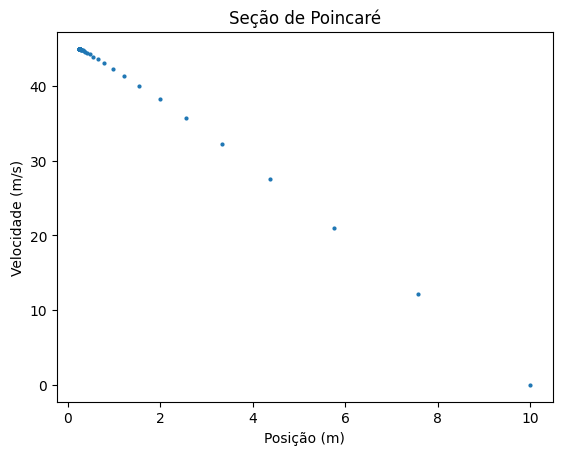

In [13]:
#Poincaré

plt.figure()
plt.scatter(x1_poincare, v1_poincare, s=4)
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')
plt.title('Seção de Poincaré')

Text(0, 0.5, 'Velocidade (m/s)')

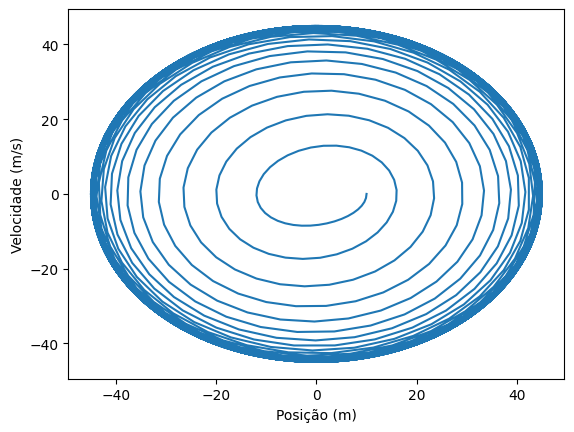

In [14]:
#diagrama de fases 
plt.plot(x1,v1)
plt.xlabel('Posição (m)')
plt.ylabel('Velocidade (m/s)')

transformada de fourier

espectro de potencia $$ P(\omega) = |F(\omega)|^2 $$

Grafico ajustando o limite nas ordenadas

Text(0.5, 1.0, 'pico central')

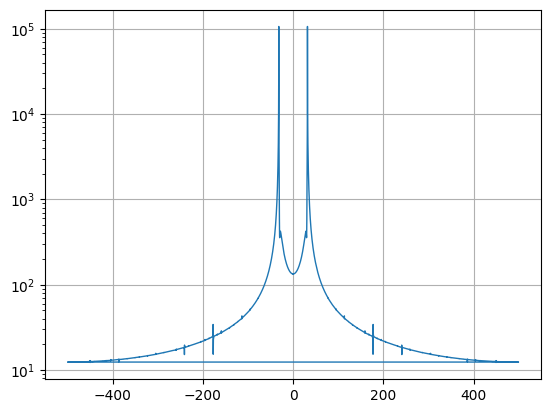

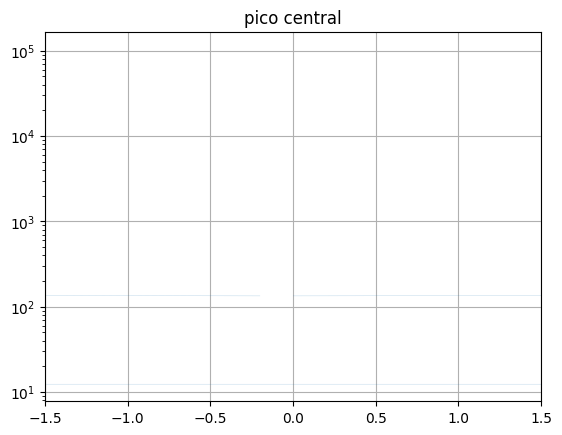

In [15]:
xf = fft(x1)
xfreq = fftfreq(len(ts), 0.001)

plt.figure()
plt.plot(xfreq, np.abs(xf), lw=1)
plt.grid()
plt.semilogy()

plt.figure()
plt.plot(xfreq, np.abs(xf),lw=.1)
plt.grid()
plt.semilogy()
plt.xlim(-1.5,1.5)
plt.title('pico central')
